In [1]:
import pandas as pd
import json
import matplotlib as plt

In [4]:
def read_times(path: str):
    times = []
    with open(path, 'r') as f:
        for key, value in json.load(f).items():
            for time in value["times"]:
                times.append({"path": path, "config": key, "time": time})
    return times


In [19]:
paths = ["echo-cache_direct_i_0.json", "echo-cache_direct_e_0.json", "echo-cache_direct_i_i.json", "echo-cache_nodirect_e_i.json", "echo-cache_nodirect_i_i.json"]
data = pd.DataFrame(sum((read_times(path) for path in paths), start=[]))
data = data.pivot_table(index=["path"], columns=["config"], values=["time"], aggfunc="mean")
data

time                          \
config                       dinc_original incr_original  incr_tsp   
path                                                                 
echo-cache_direct_e_0.json       11.243070      8.907170  8.933061   
echo-cache_direct_i_0.json       11.250799      8.979205  8.637758   
echo-cache_direct_i_i.json       10.771402      8.658073  8.313831   
echo-cache_nodirect_e_i.json     11.338117      8.828599  8.829656   
echo-cache_nodirect_i_i.json     10.821916      8.576981  8.243926   

                                           
config                       res_original  
path                                       
echo-cache_direct_e_0.json      14.347062  
echo-cache_direct_i_0.json      14.320925  
echo-cache_direct_i_i.json      13.849869  
echo-cache_nodirect_e_i.json    14.330125  
echo-cache_nodirect_i_i.json    13.780005

<AxesSubplot: xlabel='path'>

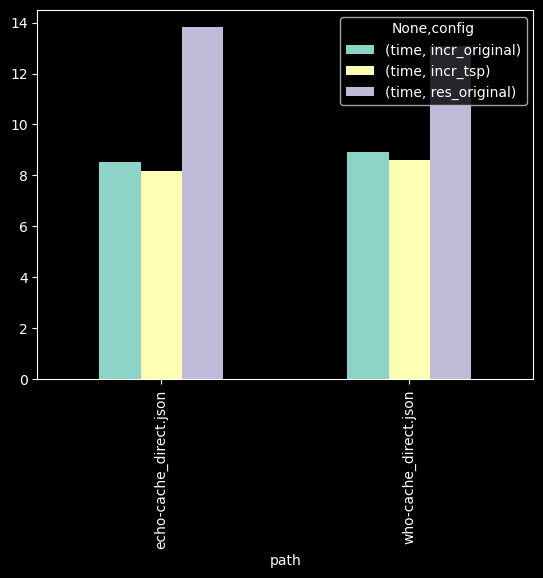

In [30]:
data.plot.bar()

In [20]:
amir_data = data.set_index(["path", "config"])
x = amir_data.loc[("echo-cache_direct_i_0.json", "res_original")]["time"].to_numpy()
x

/tmp/ipykernel_3210529/1519758276.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = amir_data.loc[("echo-cache_direct_i_0.json", "res_original")]["time"].to_numpy()


array([14.50101361, 14.34756814, 14.06750241, 14.6622839 , 14.02625559])

In [25]:
data[('time', "dummy incr impr")] = (data[('time', "res_original")] - data[('time', "dinc_original")]) / data[('time', "res_original")] * 100
data[('time', "incr impr")] = (data[('time', "res_original")] - data[('time', "incr_original")]) / data[('time', "res_original")] * 100
data[('time', "tsp incr impr")] = (data[('time', "res_original")] - data[('time', "incr_tsp")]) / data[('time', "res_original")] * 100
data[[('time', "dummy incr impr"), ('time', "incr impr")]].mean()
# data[[('time', "tsp incr impr")]]

      config         
time  dummy incr impr    21.529234
      incr impr          37.770377
dtype: float64